# Import Library

In [1]:
#library dasar
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'

#pickle
import pickle
from pickle import dump
import joblib


#library machine learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

#library performace test
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Capturing Data

In [2]:
# import dataset dari file internal PC
df = pd.read_excel (r'D:\Semester 6\KP\Indonesia Power\BFPT ADP1.xlsx')

In [3]:
# menampilkan 5 kolom pertama dataset
df.head()

,Value1,Timestamp1,UnitsAbbreviation1,Good1,Questionable1,Substituted1,Value2,Timestamp2,UnitsAbbreviation2,Good2,...,UnitsAbbreviation27,Good27,Questionable27,Substituted27,Value28,Timestamp28,UnitsAbbreviation28,Good28,Questionable28,Substituted28
0,99.488831,2020-05-18T17:10:00Z,%,True,False,False,30.069073,2020-05-18T17:10:00Z,°C,True,...,rpm,True,False,False,0.033074,2020-05-18T17:10:00Z,MPa1,True,False,False
1,99.488831,2020-05-18T17:20:00Z,%,True,False,False,30.069073,2020-05-18T17:20:00Z,°C,True,...,rpm,True,False,False,0.033077,2020-05-18T17:20:00Z,MPa1,True,False,False
2,99.482307,2020-05-18T17:30:00Z,%,True,False,False,30.069073,2020-05-18T17:30:00Z,°C,True,...,rpm,True,False,False,0.033069,2020-05-18T17:30:00Z,MPa1,True,False,False
3,99.486595,2020-05-18T17:40:00Z,%,True,False,False,30.069073,2020-05-18T17:40:00Z,°C,True,...,rpm,True,False,False,0.033069,2020-05-18T17:40:00Z,MPa1,True,False,False
4,99.482201,2020-05-18T17:50:00Z,%,True,False,False,30.069073,2020-05-18T17:50:00Z,°C,True,...,rpm,True,False,False,0.033055,2020-05-18T17:50:00Z,MPa1,True,False,False


In [4]:
# Mengubah index menjadi datetime menggunakan timestamp yang diketahui
df['Timestamp1']=pd.to_datetime(df["Timestamp1"],infer_datetime_format=True) 
df.index=df['Timestamp1'] 
df=df.drop(['Timestamp1'],axis=1) 
df.head() 

,Value1,UnitsAbbreviation1,Good1,Questionable1,Substituted1,Value2,Timestamp2,UnitsAbbreviation2,Good2,Questionable2,...,UnitsAbbreviation27,Good27,Questionable27,Substituted27,Value28,Timestamp28,UnitsAbbreviation28,Good28,Questionable28,Substituted28
Timestamp1,,,,,,,,,,,,,,,,,,,,,
2020-05-18 17:10:00,99.488831,%,True,False,False,30.069073,2020-05-18T17:10:00Z,°C,True,False,...,rpm,True,False,False,0.033074,2020-05-18T17:10:00Z,MPa1,True,False,False
2020-05-18 17:20:00,99.488831,%,True,False,False,30.069073,2020-05-18T17:20:00Z,°C,True,False,...,rpm,True,False,False,0.033077,2020-05-18T17:20:00Z,MPa1,True,False,False
2020-05-18 17:30:00,99.482307,%,True,False,False,30.069073,2020-05-18T17:30:00Z,°C,True,False,...,rpm,True,False,False,0.033069,2020-05-18T17:30:00Z,MPa1,True,False,False
2020-05-18 17:40:00,99.486595,%,True,False,False,30.069073,2020-05-18T17:40:00Z,°C,True,False,...,rpm,True,False,False,0.033069,2020-05-18T17:40:00Z,MPa1,True,False,False
2020-05-18 17:50:00,99.482201,%,True,False,False,30.069073,2020-05-18T17:50:00Z,°C,True,False,...,rpm,True,False,False,0.033055,2020-05-18T17:50:00Z,MPa1,True,False,False


In [5]:
# menampilkan 5 kolom pertama dataset
df.head()

,Value1,UnitsAbbreviation1,Good1,Questionable1,Substituted1,Value2,Timestamp2,UnitsAbbreviation2,Good2,Questionable2,...,UnitsAbbreviation27,Good27,Questionable27,Substituted27,Value28,Timestamp28,UnitsAbbreviation28,Good28,Questionable28,Substituted28
Timestamp1,,,,,,,,,,,,,,,,,,,,,
2020-05-18 17:10:00,99.488831,%,True,False,False,30.069073,2020-05-18T17:10:00Z,°C,True,False,...,rpm,True,False,False,0.033074,2020-05-18T17:10:00Z,MPa1,True,False,False
2020-05-18 17:20:00,99.488831,%,True,False,False,30.069073,2020-05-18T17:20:00Z,°C,True,False,...,rpm,True,False,False,0.033077,2020-05-18T17:20:00Z,MPa1,True,False,False
2020-05-18 17:30:00,99.482307,%,True,False,False,30.069073,2020-05-18T17:30:00Z,°C,True,False,...,rpm,True,False,False,0.033069,2020-05-18T17:30:00Z,MPa1,True,False,False
2020-05-18 17:40:00,99.486595,%,True,False,False,30.069073,2020-05-18T17:40:00Z,°C,True,False,...,rpm,True,False,False,0.033069,2020-05-18T17:40:00Z,MPa1,True,False,False
2020-05-18 17:50:00,99.482201,%,True,False,False,30.069073,2020-05-18T17:50:00Z,°C,True,False,...,rpm,True,False,False,0.033055,2020-05-18T17:50:00Z,MPa1,True,False,False


In [6]:
# Membuat variabel berisi nama masing-masing sensor
sensor = ["Recirculation Flow Control Valve Position",
"Bearing 1 Metal Temperature No 1",
"Bearing 1 Metal Temperature No 2",
"Bearing 1X Axis Vibration",
"Bearing 1Y Axis Vibration",
"Bearing 1 Drain Oil Temperature",
"Bearing 2 Metal Temperature No 1",
"Bearing 2 Metal Temperature No 2",
"Bearing 2X Axis Vibration",
"Bearing 2Y Axis Vibration",
"Bearing 2 Drain Oil Temperature",
"Bearing 3 Drain Oil Temperature",
"Bearing 4 Drain Oil Temperature",
"Thrust Bearing Metal Temperature No 1",
"Thrust Bearing Metal Temperature No 2",
"Thrust Bearing Metal Temperature No 3",
"Thrust Bearing Metal Temperature No 4",
"Thrust Bearing Metal Temperature No 5",
"Thrust Bearing Metal Temperature No 6",
"Thrust Bearing Metal Temperature No 7",
"Thrust Bearing Metal Temperature No 8",
"Thrust Bearing Drain Oil Temperature No 1",
"Thrust Bearing Drain Oil Temperature No 2",
"Inlet Steam Pressure",
"Axial Displacement No 1",
"Axial Displacement No 2",
"Speed",
"Bearing Oil Pressure"]

In [7]:
# Menghapus coloumn yang tidak berisi data numerik pengukuran
data = df[['Value1','Value2', 'Value3', 'Value4', 'Value5', 'Value6','Value7','Value8','Value9','Value10','Value11','Value12','Value13','Value14','Value15','Value16','Value17','Value18','Value19','Value20','Value21','Value22','Value23','Value24','Value25','Value26','Value27','Value28']]
# Mengganti nama coloumn menjadi nama sensor
data.columns = sensor
# Mengecek tipe data dari setiap kolom data train
data.dtypes

Recirculation Flow Control Valve Position    float64
Bearing 1 Metal Temperature No 1             float64
Bearing 1 Metal Temperature No 2             float64
Bearing 1X Axis Vibration                    float64
Bearing 1Y Axis Vibration                    float64
Bearing 1 Drain Oil Temperature              float64
Bearing 2 Metal Temperature No 1             float64
Bearing 2 Metal Temperature No 2             float64
Bearing 2X Axis Vibration                    float64
Bearing 2Y Axis Vibration                    float64
Bearing 2 Drain Oil Temperature              float64
Bearing 3 Drain Oil Temperature              float64
Bearing 4 Drain Oil Temperature              float64
Thrust Bearing Metal Temperature No 1        float64
Thrust Bearing Metal Temperature No 2        float64
Thrust Bearing Metal Temperature No 3        float64
Thrust Bearing Metal Temperature No 4        float64
Thrust Bearing Metal Temperature No 5        float64
Thrust Bearing Metal Temperature No 6        f

# Exploratory data

In [8]:
# Jika terdapat data type non-numeric, gunakan ini
#data = data.apply(lambda col:pd.to_numeric(col, errors='coerce'))

numpy.ndarray

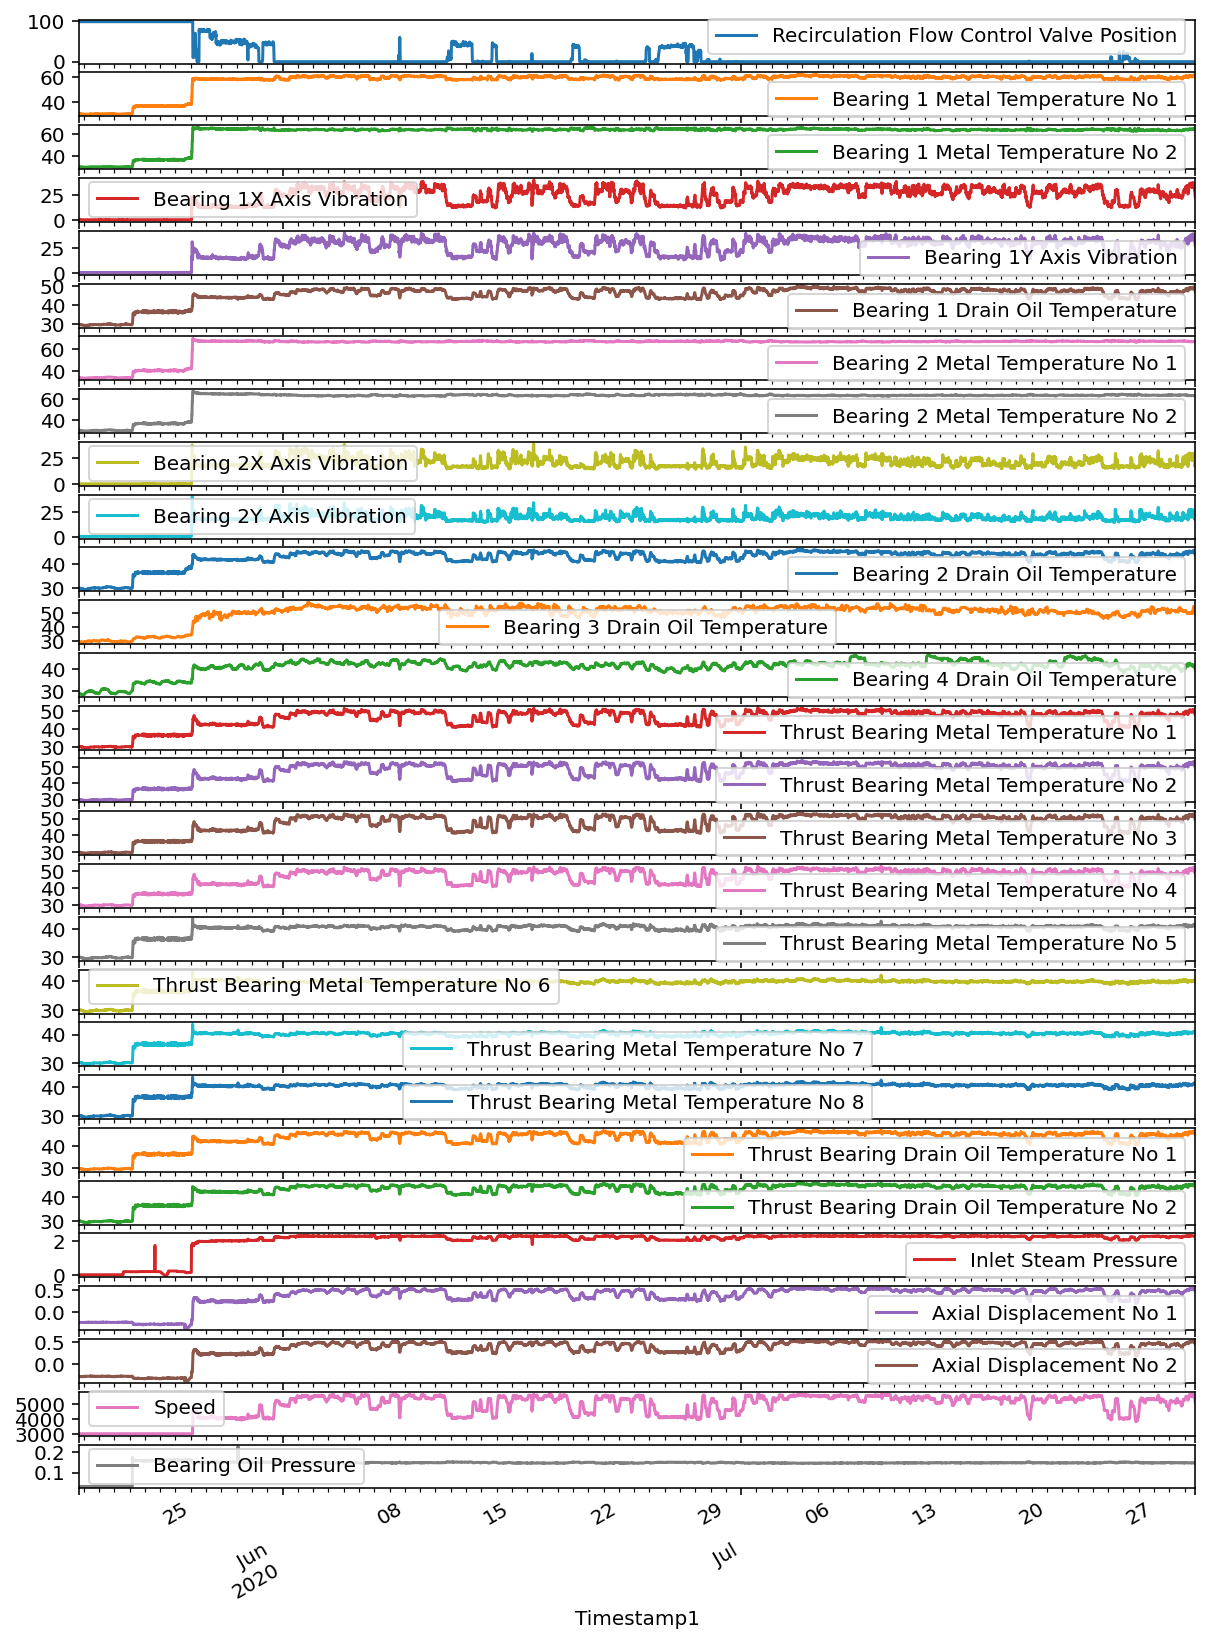

In [9]:
# Visualisasi data dengan subplot
axes = data.plot.line(subplots=True,figsize=(10,15)) 
type(axes)

In [10]:
# Memastikan tidak ada data NAN di dalam dataset
data.isnull().sum()

Recirculation Flow Control Valve Position    0
Bearing 1 Metal Temperature No 1             0
Bearing 1 Metal Temperature No 2             0
Bearing 1X Axis Vibration                    0
Bearing 1Y Axis Vibration                    0
Bearing 1 Drain Oil Temperature              0
Bearing 2 Metal Temperature No 1             0
Bearing 2 Metal Temperature No 2             0
Bearing 2X Axis Vibration                    0
Bearing 2Y Axis Vibration                    0
Bearing 2 Drain Oil Temperature              0
Bearing 3 Drain Oil Temperature              0
Bearing 4 Drain Oil Temperature              0
Thrust Bearing Metal Temperature No 1        0
Thrust Bearing Metal Temperature No 2        0
Thrust Bearing Metal Temperature No 3        0
Thrust Bearing Metal Temperature No 4        0
Thrust Bearing Metal Temperature No 5        0
Thrust Bearing Metal Temperature No 6        0
Thrust Bearing Metal Temperature No 7        0
Thrust Bearing Metal Temperature No 8        0
Thrust Bearin

# Data preprocessing

Selanjutnya dilakukan plot analisis korelasi yang bertujuan untuk melihat dipendensi atau korelasi parameter satu dengan yang lain

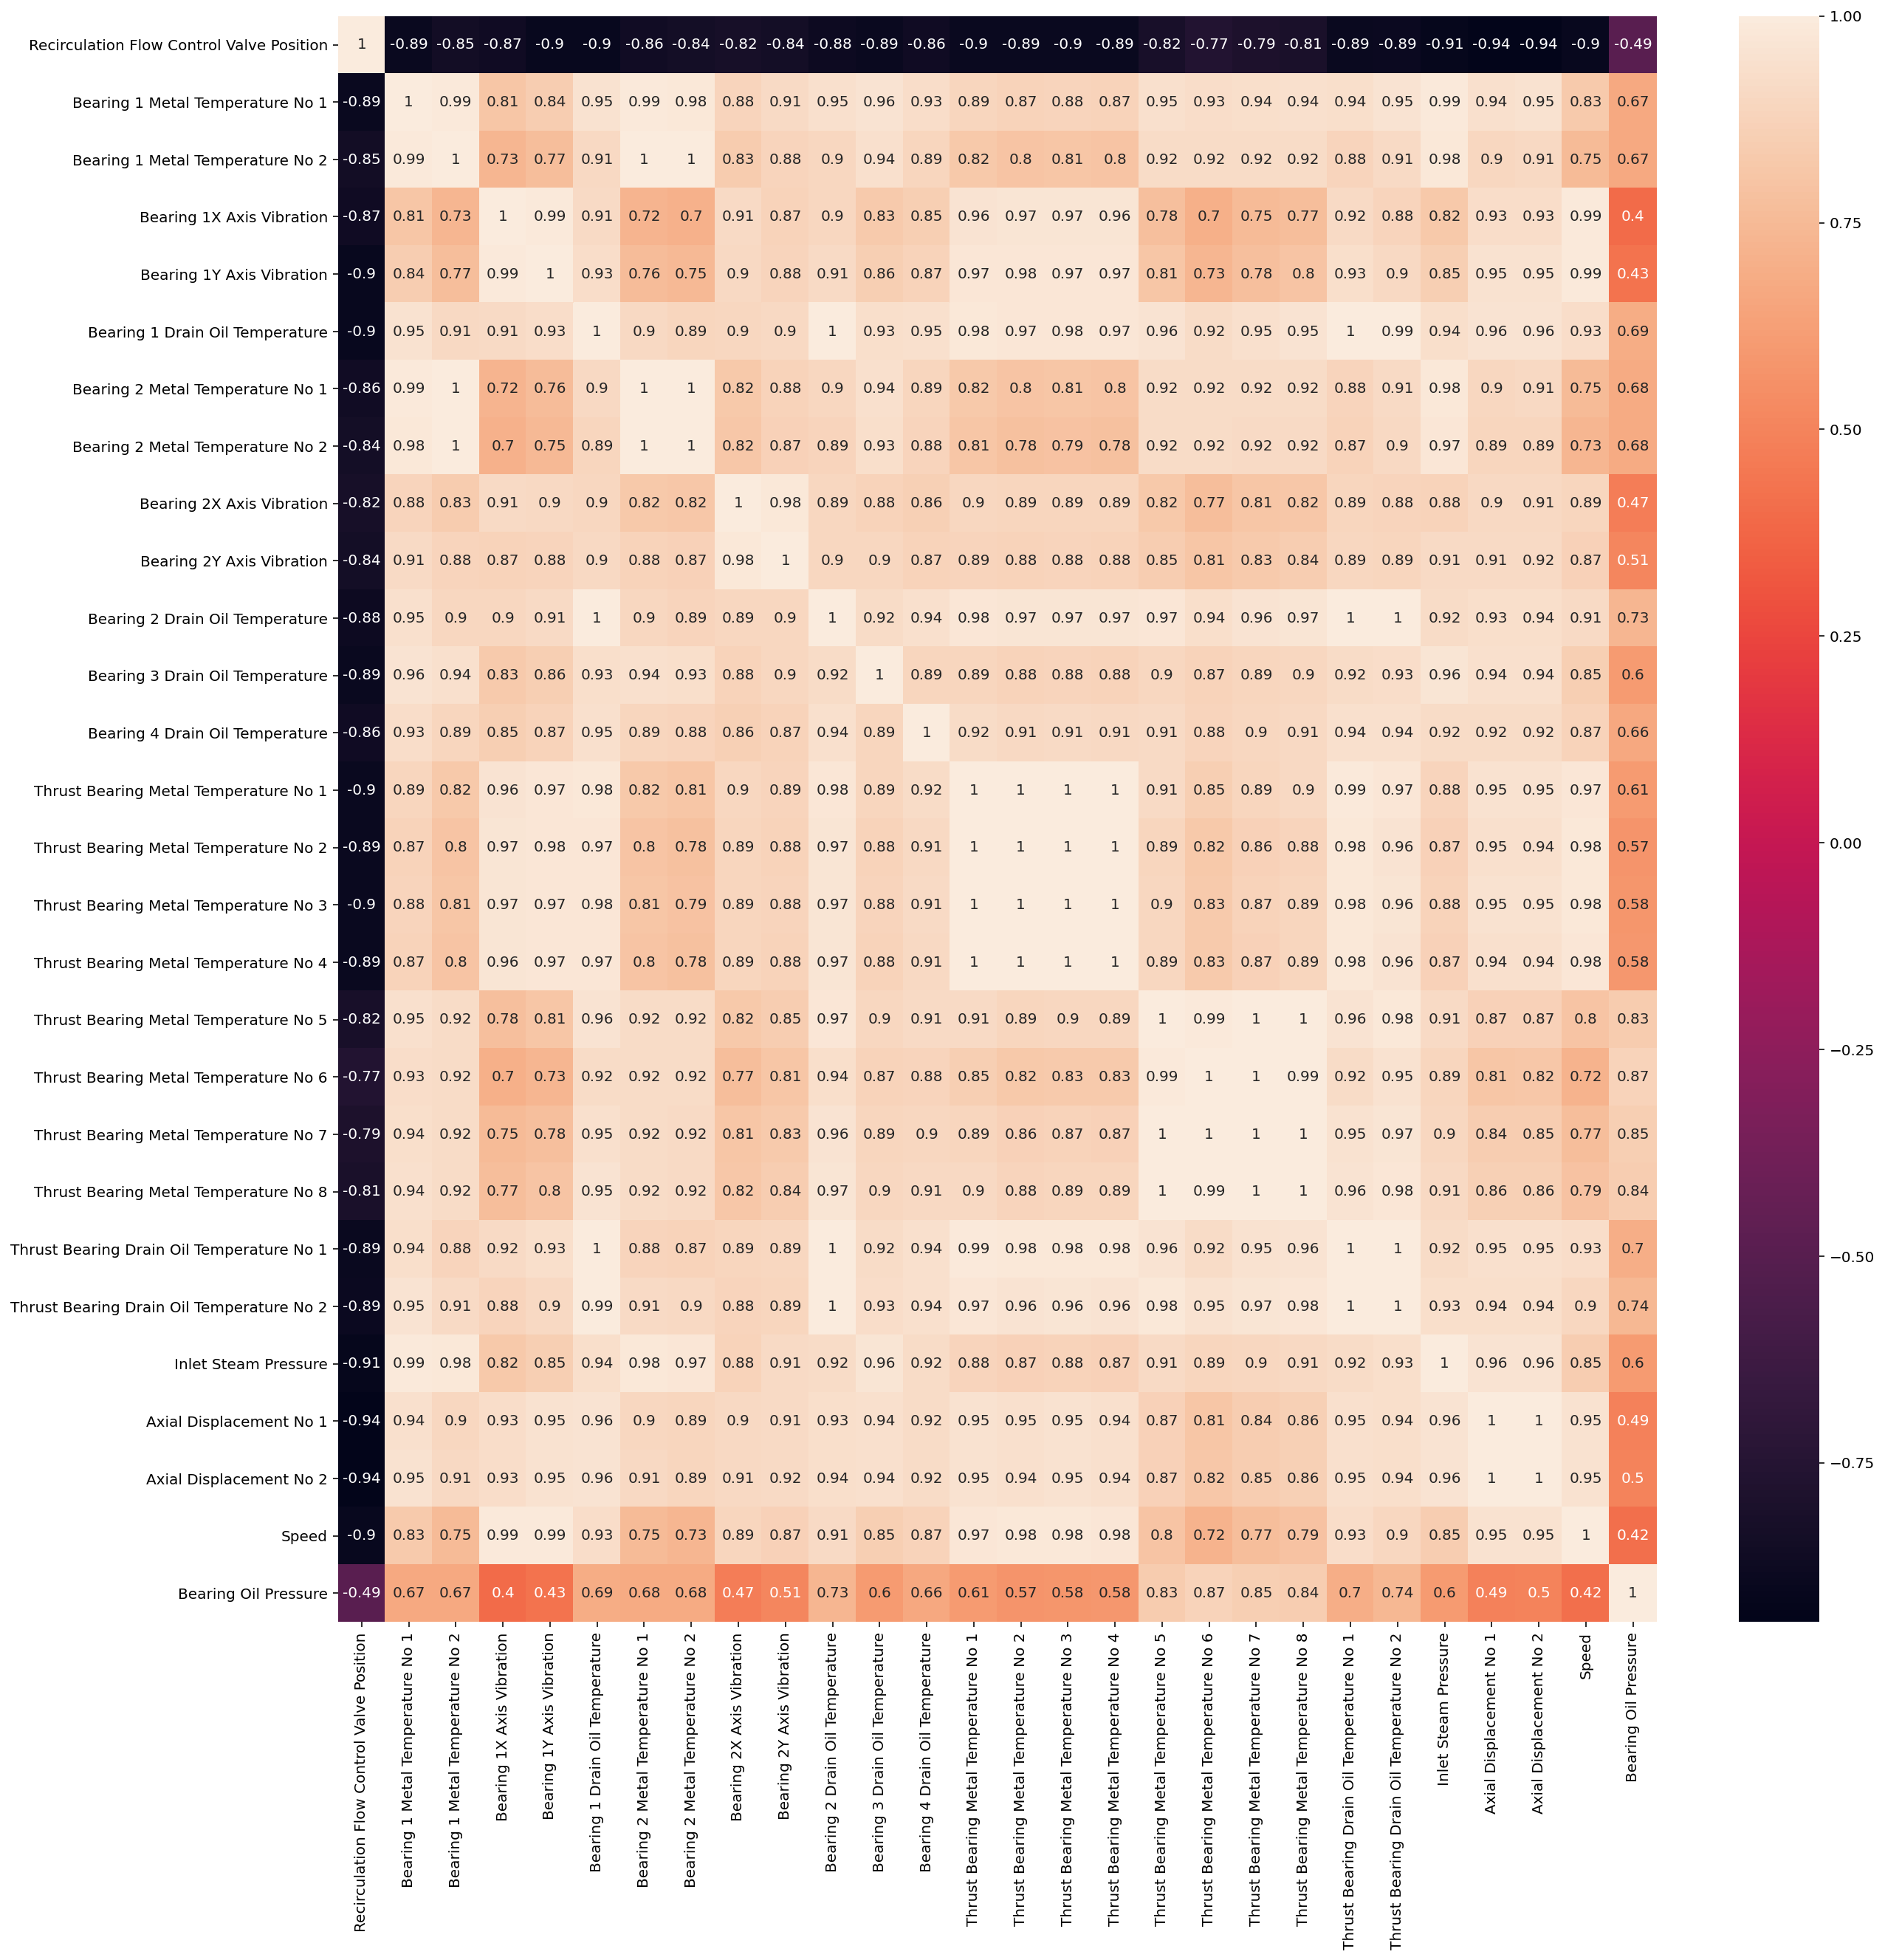

In [11]:
# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(20,20))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

In [12]:
# membuat fungsi yang menemukan nilai korelasi dengan threshold yang dapat ditentukan
def find_corr_pairs(corr,thrsh):
    
    """
    find high correlation column pairs in df 
    ======================================
    input: 
    corr - (df)- correlation matrix generated by pandas
    thrsh - (float) threshold value to consider correlation as high so that it is included in the output 
    output:
    high_corr_pairs - (list) list of tuples of the two-column names and their correlation. corr> thrsh
    """
    high_corr_pairs = []
    # same as input 'corr' but the upper -triangle half of the matrix is zeros ( for convenience only) 
    corr_diag = pd.DataFrame(np.tril(corr.values), columns=corr.columns, index = corr.index)

    # check  the correlation between every pair of columns in the corr and keeps the high ones
    for col_num , col in enumerate(corr_diag):
        col_corr=corr_diag[col].iloc[col_num+1:] # this slicing ensures ignoring self_corr and duplicates due to symmetry
        # bool mask for pairs with high corr with col
        mask_pairs = col_corr.apply(lambda x: abs(x))>thrsh 
        idx_pairs=col_corr[mask_pairs].index

        # create list of high corr pairs
        for idx , corr in zip(idx_pairs,col_corr[mask_pairs].values):
            high_corr_pairs.append((col, idx, corr))
    
    return high_corr_pairs



In [13]:
# menemukan parameter yang berkorelasi > 0.9 (very high correlation)
corr_pairs=find_corr_pairs(corrMatrix,0.9)
for c in corr_pairs:
    print(c)

('Recirculation Flow Control Valve Position', 'Inlet Steam Pressure', -0.9148805103699448)
('Recirculation Flow Control Valve Position', 'Axial Displacement No 1', -0.942404239058418)
('Recirculation Flow Control Valve Position', 'Axial Displacement No 2', -0.9405367260820297)
('Bearing 1 Metal Temperature No 1', 'Bearing 1 Metal Temperature No 2', 0.9893289480687094)
('Bearing 1 Metal Temperature No 1', 'Bearing 1 Drain Oil Temperature', 0.9531463565976421)
('Bearing 1 Metal Temperature No 1', 'Bearing 2 Metal Temperature No 1', 0.9884535060770855)
('Bearing 1 Metal Temperature No 1', 'Bearing 2 Metal Temperature No 2', 0.9842893290529077)
('Bearing 1 Metal Temperature No 1', 'Bearing 2Y Axis Vibration', 0.9145685060480895)
('Bearing 1 Metal Temperature No 1', 'Bearing 2 Drain Oil Temperature', 0.9453503241309169)
('Bearing 1 Metal Temperature No 1', 'Bearing 3 Drain Oil Temperature', 0.960907536834875)
('Bearing 1 Metal Temperature No 1', 'Bearing 4 Drain Oil Temperature', 0.92821095

Parameter yang memiliki nilai korelasi tinggi dengan parameter lain akan dihapus karena dianggap trend-nya telah diwakili oleh parameter lain tersebut.
Setelah dievaluasi, didapat 4 parameter yang merepresentasikan 28 parameter yakni :
1. Recirculation Flow Control Valve Position
2. Bearing 1 Metal Temperature No 1 
3. Bearing 1X Axis Vibration
4. Bearing Oil Pressure  

In [14]:
# Membuat dataset untuk 4 parameter yang didapat
data = data[['Recirculation Flow Control Valve Position','Bearing 1 Metal Temperature No 1','Bearing 1X Axis Vibration','Bearing Oil Pressure']]

Text(0.5, 1.0, 'Bearing Oil Pressure')

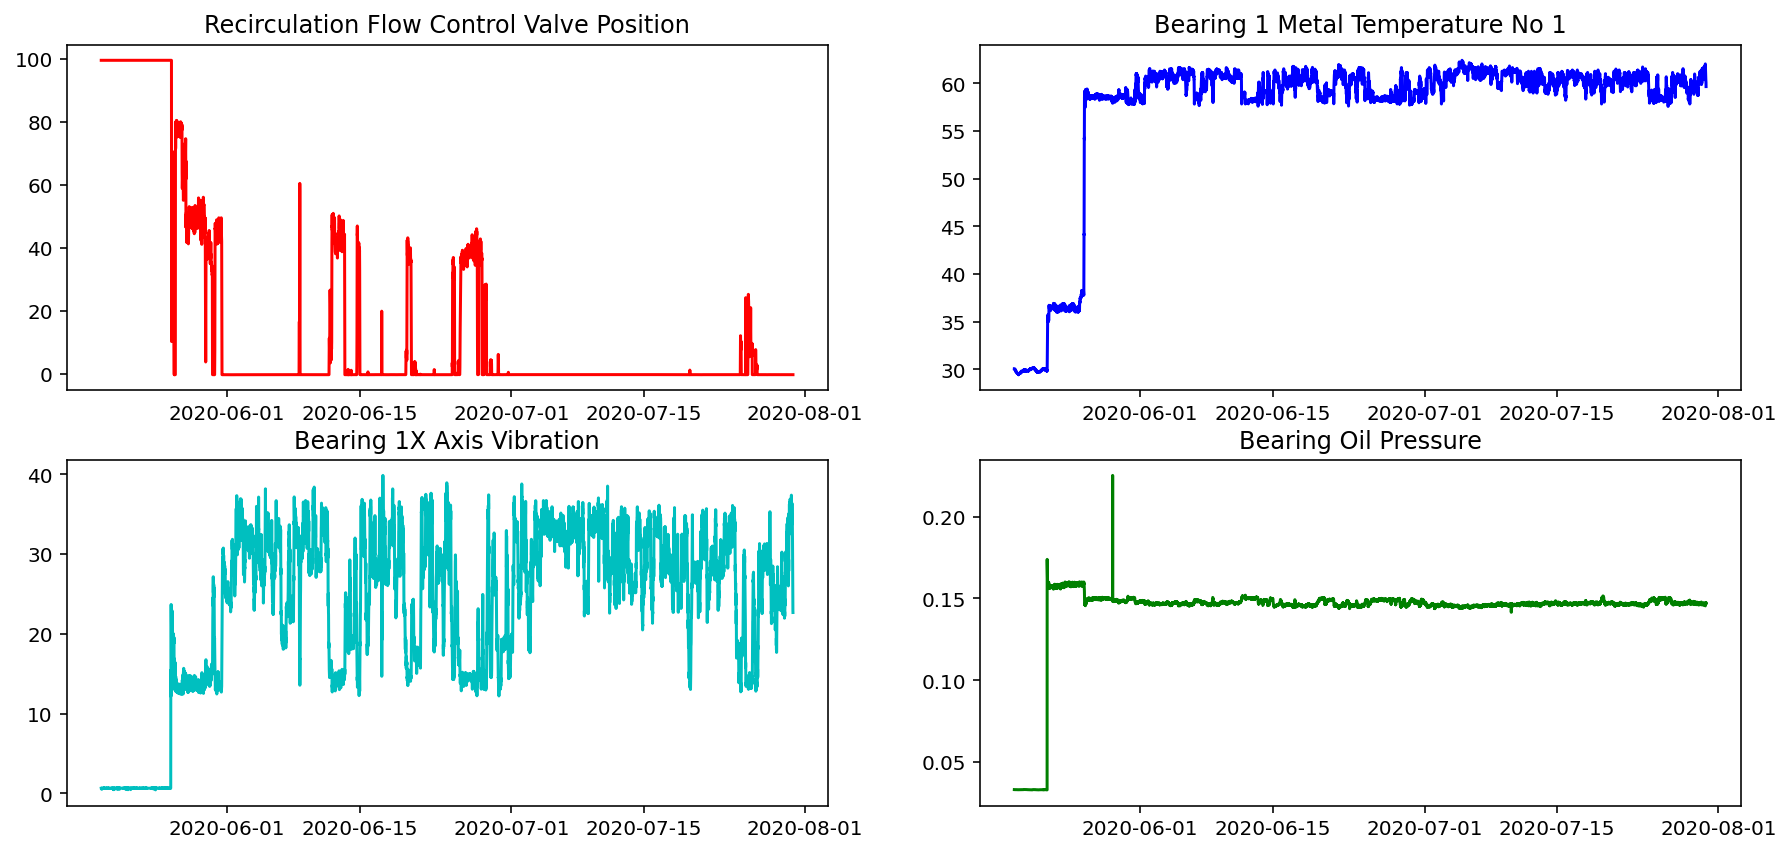

In [15]:
# Visualisasi untuk melihat trend masing-masing parameter
fig = plt.figure(figsize=(15,7))

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (0,1),)
ax3 = plt.subplot2grid((2,2), (1,0),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.plot(data["Recirculation Flow Control Valve Position"],'r')
ax1.set_title("Recirculation Flow Control Valve Position")
ax2.plot(data["Bearing 1 Metal Temperature No 1"],'b')
ax2.set_title("Bearing 1 Metal Temperature No 1")
ax3.plot(data["Bearing 1X Axis Vibration"],'c')
ax3.set_title("Bearing 1X Axis Vibration")
ax4.plot(data["Bearing Oil Pressure"],'g')
ax4.set_title("Bearing Oil Pressure")

Pada visualisasi diatas, terlihat pada data awal terjadi anomali.
Menurut catatan 'Kerusakan Unit' itu terjadi karena 'dalam rangka RS siaga beban rendah (Covid-19)' artinya anomali ini sifatnya 'disengaja' sehingga bukan merupakan data abnormal yang diinginkan

In [16]:
# Menyusun kembali dataset dengan menghilangkan anomali yang tidak diinginkan
data = data.loc['2020-05-29 12:00:00':] 

In [17]:
data

,Recirculation Flow Control Valve Position,Bearing 1 Metal Temperature No 1,Bearing 1X Axis Vibration,Bearing Oil Pressure
Timestamp1,,,,
2020-05-29 12:00:00,54.248058,58.128639,12.540008,0.149471
2020-05-29 12:10:00,51.125057,58.327660,12.879145,0.149028
2020-05-29 12:20:00,50.219398,58.275848,13.564992,0.149177
2020-05-29 12:30:00,48.919716,58.365597,13.232581,0.148903
2020-05-29 12:40:00,53.283325,58.454929,13.304584,0.149332
...,...,...,...,...
2020-07-30 16:20:00,-0.340180,60.619240,27.892962,0.147330
2020-07-30 16:30:00,-0.338056,60.287003,25.375938,0.146901
2020-07-30 16:40:00,-0.340469,60.237198,24.619781,0.147407


In [18]:
# menampilkan 5 kolom pertama dan 5 kolom terakhir dataset
data

,Recirculation Flow Control Valve Position,Bearing 1 Metal Temperature No 1,Bearing 1X Axis Vibration,Bearing Oil Pressure
Timestamp1,,,,
2020-05-29 12:00:00,54.248058,58.128639,12.540008,0.149471
2020-05-29 12:10:00,51.125057,58.327660,12.879145,0.149028
2020-05-29 12:20:00,50.219398,58.275848,13.564992,0.149177
2020-05-29 12:30:00,48.919716,58.365597,13.232581,0.148903
2020-05-29 12:40:00,53.283325,58.454929,13.304584,0.149332
...,...,...,...,...
2020-07-30 16:20:00,-0.340180,60.619240,27.892962,0.147330
2020-07-30 16:30:00,-0.338056,60.287003,25.375938,0.146901
2020-07-30 16:40:00,-0.340469,60.237198,24.619781,0.147407


Text(0.5, 1.0, 'Bearing Oil Pressure')

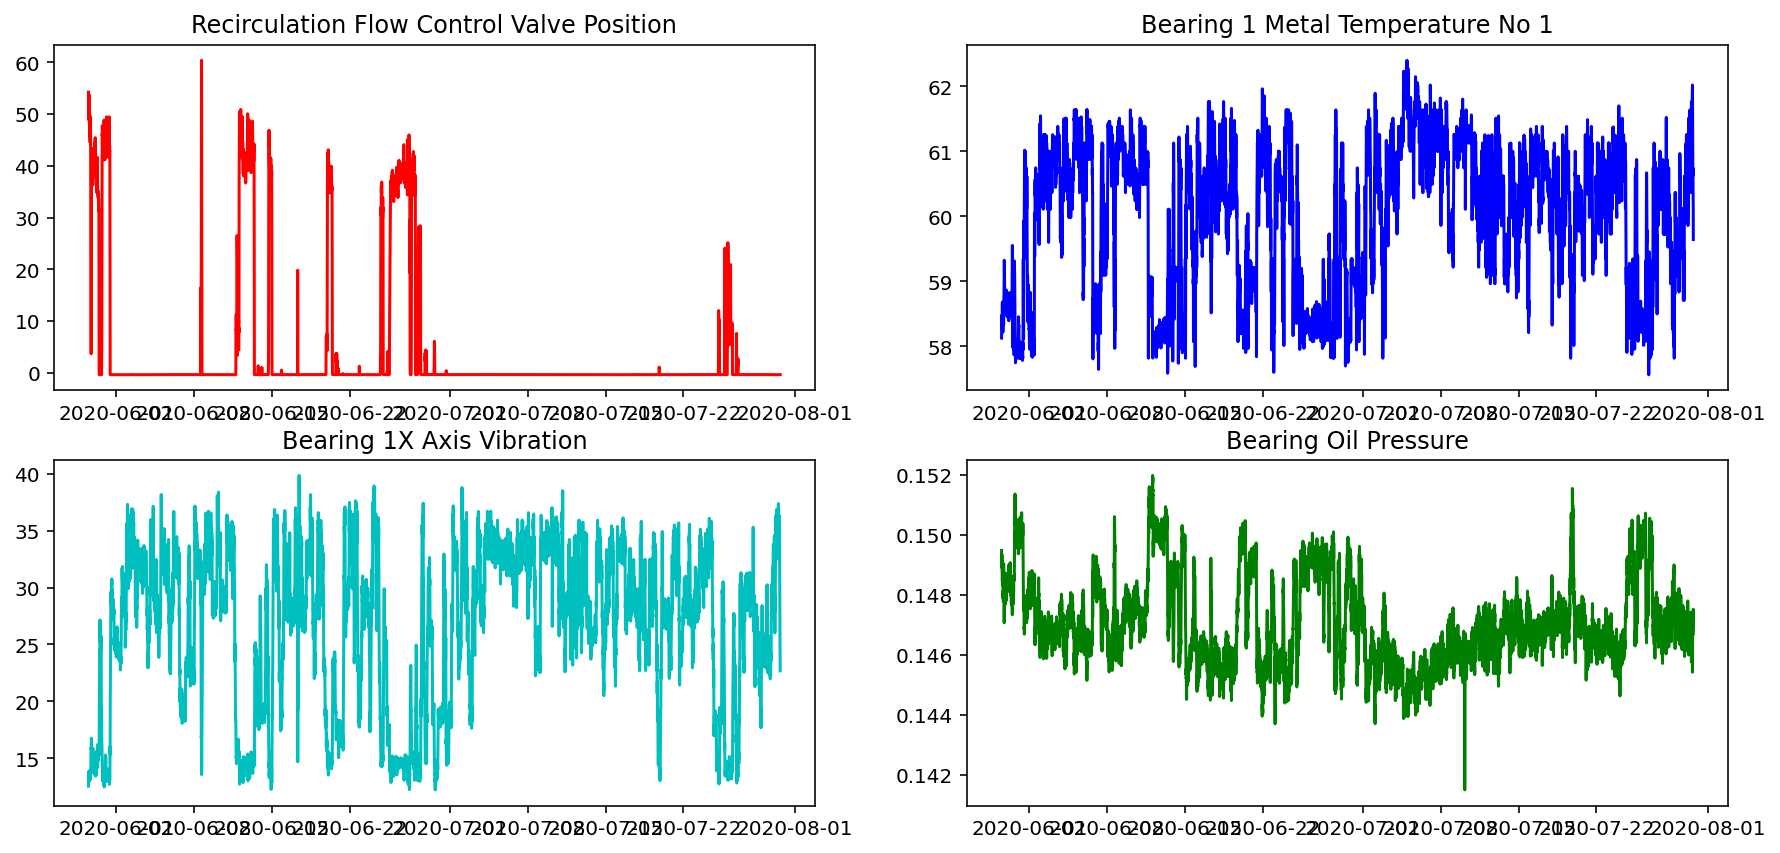

In [19]:
# Visualisasi untuk melihat trend masing-masing parameter
fig = plt.figure(figsize=(15,7))

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (0,1),)
ax3 = plt.subplot2grid((2,2), (1,0),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.plot(data["Recirculation Flow Control Valve Position"],'r')
ax1.set_title("Recirculation Flow Control Valve Position")
ax2.plot(data["Bearing 1 Metal Temperature No 1"],'b')
ax2.set_title("Bearing 1 Metal Temperature No 1")
ax3.plot(data["Bearing 1X Axis Vibration"],'c')
ax3.set_title("Bearing 1X Axis Vibration")
ax4.plot(data["Bearing Oil Pressure"],'g')
ax4.set_title("Bearing Oil Pressure")

In [20]:
# scaler untuk output
from sklearn.preprocessing import MinMaxScaler
rescaler = MinMaxScaler()
data1 = rescaler.fit_transform(data[['Bearing 1X Axis Vibration']])
#menampilkan Setelah Scaling
print("Min:", np.min(data1))
print("Max:", np.max(data1))

Min: 0.0
Max: 1.0


In [21]:
#save scaler.pkl
dump(rescaler, open('rescaler.pkl', 'wb'))

In [22]:
# scaler data : menormalisasi (rentang 0 sampai 1)
scaler = MinMaxScaler()


data[['Recirculation Flow Control Valve Position','Bearing 1 Metal Temperature No 1','Bearing 1X Axis Vibration','Bearing Oil Pressure']] = scaler.fit_transform(data[['Recirculation Flow Control Valve Position','Bearing 1 Metal Temperature No 1','Bearing 1X Axis Vibration','Bearing Oil Pressure']])

#menampilkan Setelah Scaling
print("Min:", np.min(data))
print("Max:", np.max(data))

Min: Recirculation Flow Control Valve Position    0.0
Bearing 1 Metal Temperature No 1             0.0
Bearing 1X Axis Vibration                    0.0
Bearing Oil Pressure                         0.0
dtype: float64
Max: Recirculation Flow Control Valve Position    1.0
Bearing 1 Metal Temperature No 1             1.0
Bearing 1X Axis Vibration                    1.0
Bearing Oil Pressure                         1.0
dtype: float64


In [23]:
#save scaler.pkl
dump(scaler, open('scaler.pkl', 'wb'))

## Mendefinisikan objektif

Dari 4 parameter yang ada objektif dan prediktor didefinisikan sebagai berikut :
1. Objektif : Bearing 1X Axis Vibration
2. Prediktor : Recirculation Flow Control Valve Position, Bearing 1 Metal Temperature No 1, Bearing 1X Axis Vibration, Bearing Oil Pressure

In [24]:
# mendefinisikan objektif atau target
target = data['Bearing 1X Axis Vibration']

### PCA 

Analisis PCA dilakukan untuk 4 prediktor untuk menemukan satu fitur prediktor yang representatif (variance > 80%)

In [25]:
# PCA dengan 1 komponen output
from sklearn.decomposition import PCA
pca = PCA(n_components=1, svd_solver= 'full')
dataPCA = pca.fit_transform(data)
dataPCA = pd.DataFrame(dataPCA)
dataPCA.index =data.index

# Menampilkan persentase variace hasil PCA
pv = pca.explained_variance_ratio_ * 100
print('Variace PCA: %f' % pv)

Variace PCA: 82.502145


In [26]:
# save pca.pkl
dump(pca, open('pca.pkl', 'wb'))

In [27]:
# deskripsi output PCA yang kini menjadi satu-satunya prediktor
dataPCA.describe()

,0
count,8.959000e+03
mean,-2.379315e-17
std,3.774611e-01
min,-6.307120e-01
25%,-3.004685e-01
50%,-1.122456e-01
75%,2.495041e-01
max,1.019741e+00


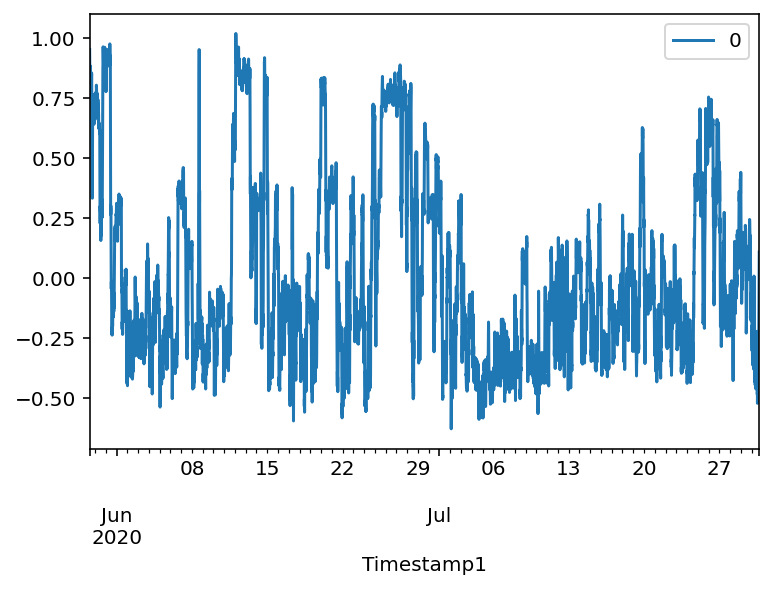

In [28]:
# Visualisasi plot prediktor
dataPCA.plot()

### Menentukan data train dan data fitting

In [29]:
# train_set adalah data prediktor yang hendak di-training
# test_set adalah data prediktor yang hendak dicocokkan dengan output model untuk dievaluasi (BUKAN DATA TEST)
# target_train adalah data objektif yang hendak di-training
# target_test adalah data objektif yang hendak dicocokkan dengan output model untuk dievaluasi (BUKAN DATA TEST)

train_set = dataPCA.head(8511-720)
test_set = dataPCA.tail(720)
target_train = target.head(8511-720)
target_test = target.tail(720)


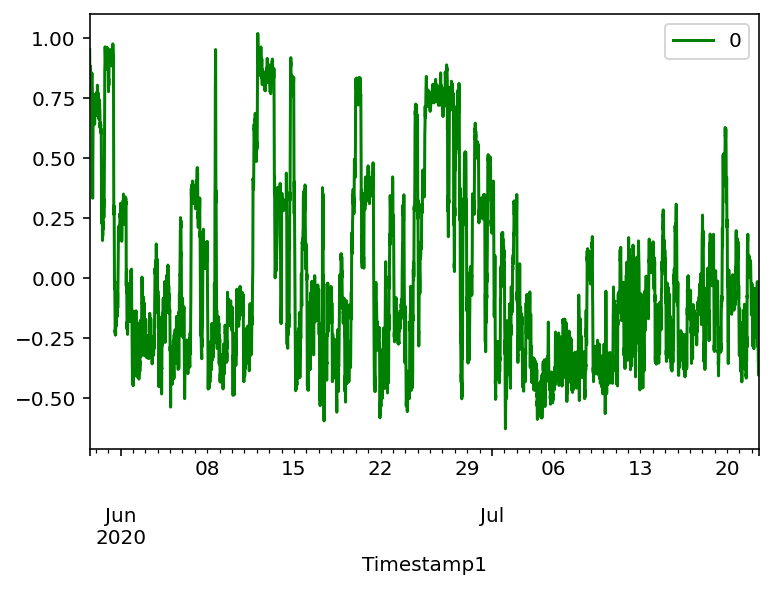

In [30]:
# Visualisasi train_set
train_set.plot(color='g')

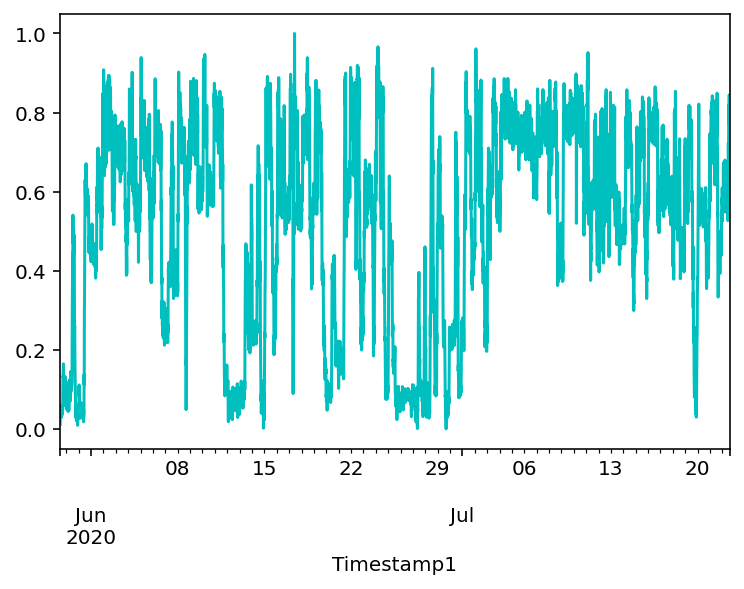

In [31]:
# Visualisasi target_train
target_train.plot(color='c')

### Setup data train dan data fitting

In [32]:
# fungsi membuat dataset
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [33]:
time_steps = 10

# reshape to [samples, time_steps, n_features]
# membuat dataset data yang akan di-training
X_train, y_train = create_dataset(train_set, target_train, time_steps)
# membuat dataset data untuk fitting atau evaluasi model
X_test, y_test = create_dataset(test_set, target_test, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7781, 10, 1) (7781,)
(710, 10, 1) (710,)


In [34]:
X_test.shape

(710, 10, 1)

# Model

Model yang digunakan adalah RNN - LSTM

In [35]:
model = keras.Sequential() #Menyimpan perintah sequential dalam variabel model
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
# loss dihitung dari mse karena forcasting dilakukan dengan pendekatan regresi
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001),metrics=['mse'])

In [36]:
# fungsi callback 
path_checkpoint = '23_checkpoint.keras'
# ini memungkinkan proses iterasi (epochs) dihentikan jika nilai validation loss mengalami kenaikan (patience) sebanyak 5 kali
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)
callbacks = callback_early_stopping

In [37]:
# compile model
history = model.fit(
    X_train, y_train, #X_train dan y_train sebagai prediktor dan objektif 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False,
    callbacks=[callbacks]
)

Train on 7002 samples, validate on 779 samples
Epoch 1/30
7002/7002 [==============================] - 12s 2ms/sample - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2/30
7002/7002 [==============================] - 5s 766us/sample - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3/30
7002/7002 [==============================] - 5s 769us/sample - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4/30
7002/7002 [==============================] - 6s 840us/sample - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 5/30
7002/7002 [==============================] - 6s 803us/sample - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 6/30
7002/7002 [==============================] - 6s 817us/sample - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 7/30
7002/7002 [==============================] - 5s 769us/sample - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0024 - val_

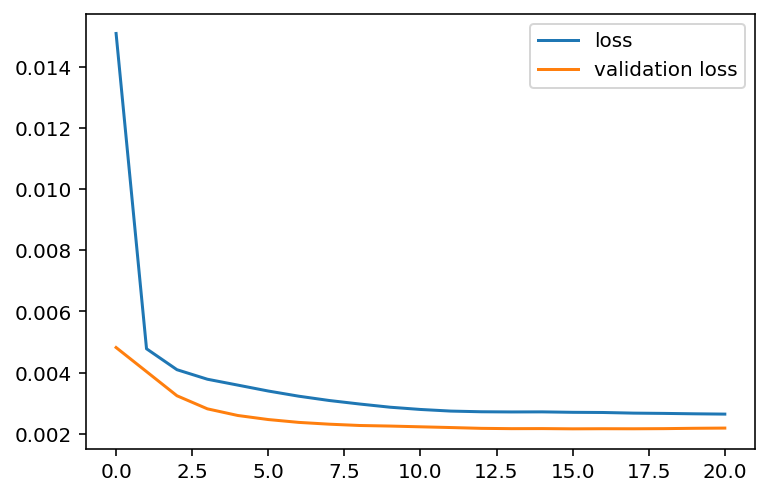

In [38]:
# menampilkan plot loss dan validation loss setiap epoch
# plot ini dapat menunjukkan model underfitting, goodfitting, atau overfitting
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend();

In [39]:
# save model.h5
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


## Evaluasi Model

Bukan menampilkan hasil prediksi, tetapi memperlihatkan seberapa baik model mengikuti (fitting) terhadap data aktual

In [40]:
# memasukkan input prediktor ke pada model
y_model = model.predict(X_test)

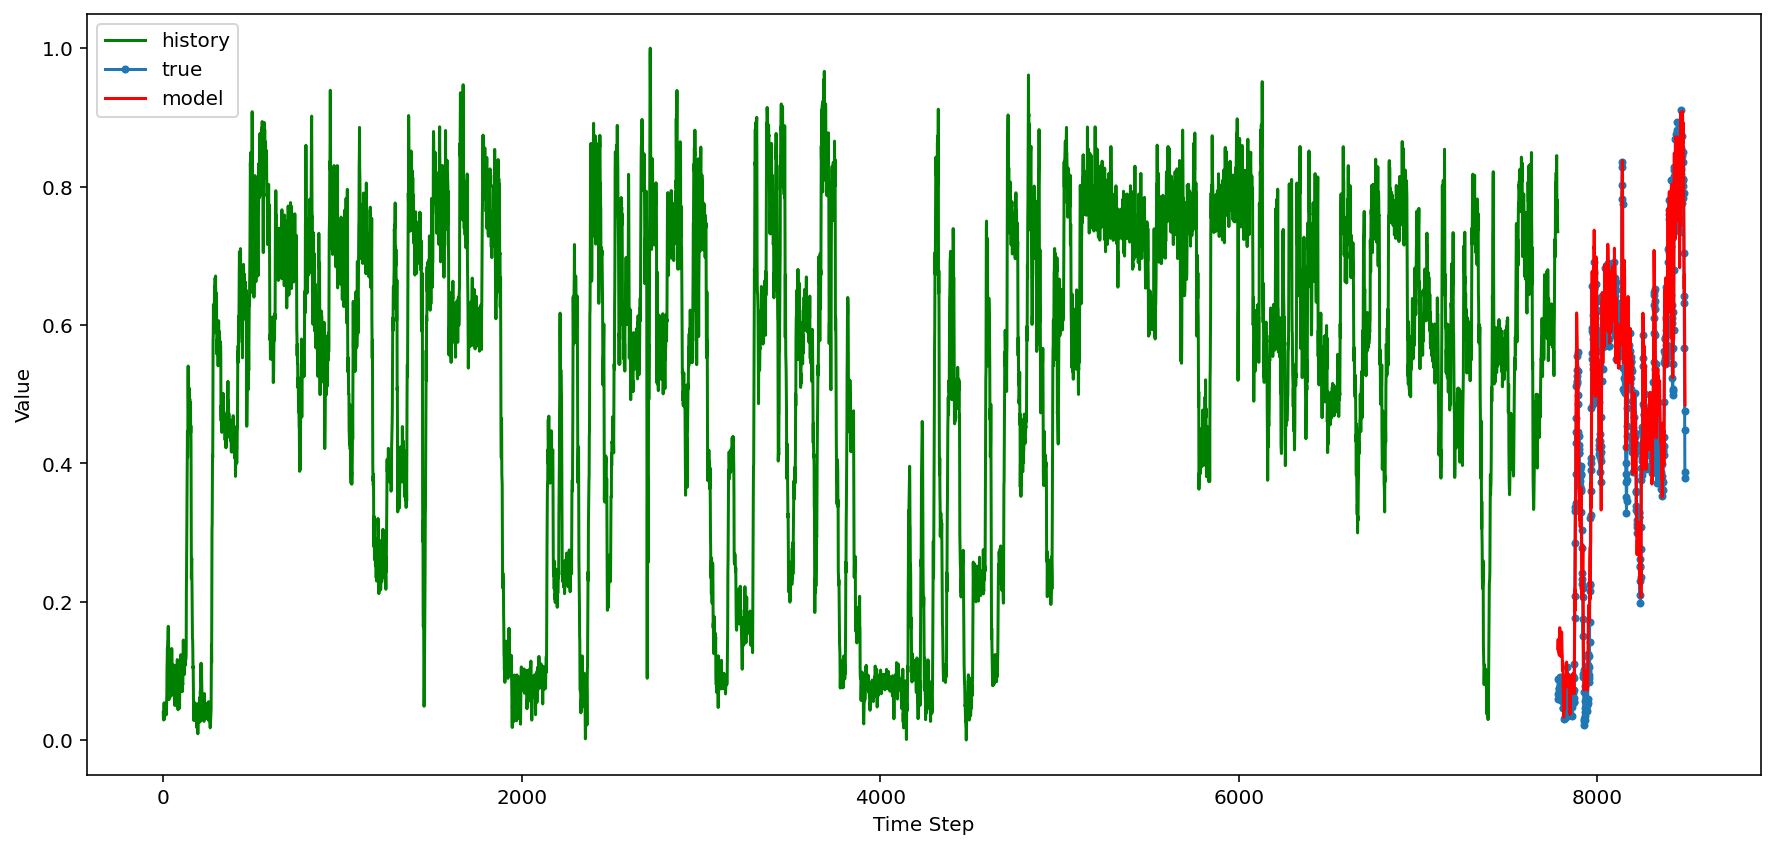

In [41]:
# menampilkan hasil fitting
fig = plt.figure(figsize=(15,7))
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_model, 'r', label="model")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

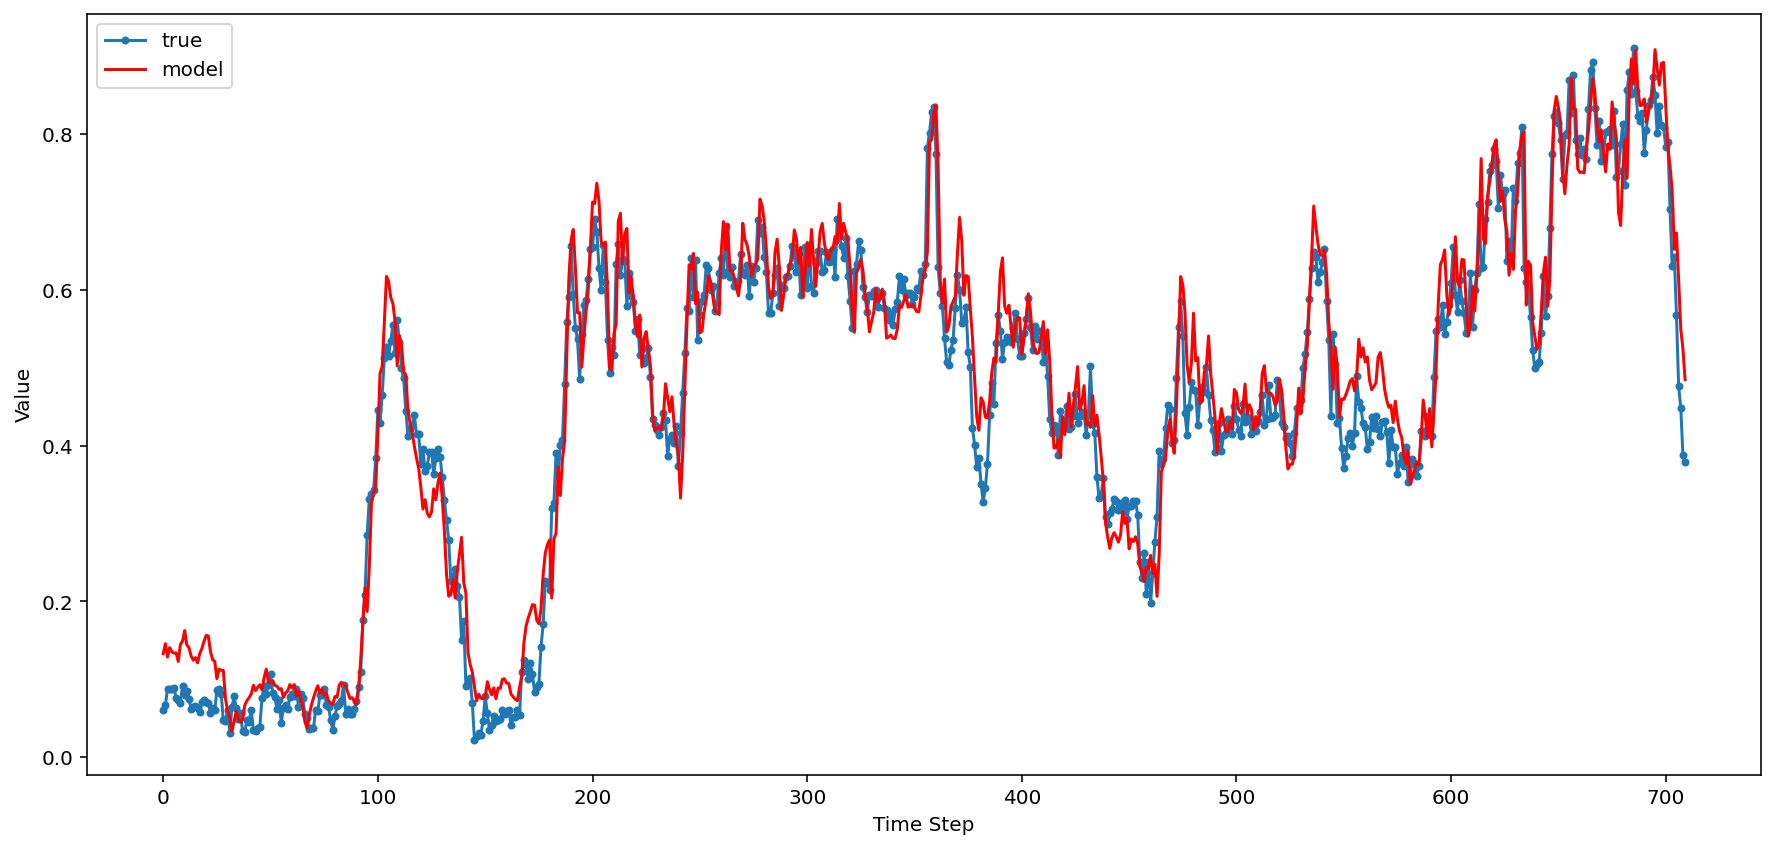

In [42]:
# menampilkan hasil fitting pada rentang tertentu
fig = plt.figure(figsize=(15,7))
plt.plot(y_test, marker='.', label="true")
plt.plot(y_model, 'r', label="model")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [43]:
# Nilai R square
# menunjukkan seberapa identik model mengikuti data aktual

R2 = r2_score(y_test, y_model)
print('R2 Score: %f' % R2)


R2 Score: 0.955634


# Prediksi

Pada section ini, model yang sudah dibuat akan dicoba untuk melakukan prediksi dengan memberikan input prediktor

### Mengambil data

In [93]:
data_coba = data.loc['2020-05-29 12:10:00':'2020-05-31 12:00:00']
data_coba

,Recirculation Flow Control Valve Position,Bearing 1 Metal Temperature No 1,Bearing 1X Axis Vibration,Bearing Oil Pressure
Timestamp1,,,,
2020-05-29 12:10:00,0.847218,0.157869,0.023955,0.718725
2020-05-29 12:20:00,0.832316,0.147156,0.048773,0.732954
2020-05-29 12:30:00,0.810931,0.165713,0.036744,0.706774
2020-05-29 12:40:00,0.882730,0.184184,0.039350,0.747759
2020-05-29 12:50:00,0.883773,0.185214,0.052631,0.717968
...,...,...,...,...
2020-05-31 11:20:00,0.000457,0.178296,0.363112,0.618432
2020-05-31 11:30:00,0.000483,0.114338,0.411855,0.596367
2020-05-31 11:40:00,0.000288,0.260289,0.408490,0.570749


### Prediktor

In [94]:
# menentukan input atau prediktor
prediktor = data_coba.head(144) #prediktor sebagai input data

In [95]:
prediktor

,Recirculation Flow Control Valve Position,Bearing 1 Metal Temperature No 1,Bearing 1X Axis Vibration,Bearing Oil Pressure
Timestamp1,,,,
2020-05-29 12:10:00,0.847218,0.157869,0.023955,0.718725
2020-05-29 12:20:00,0.832316,0.147156,0.048773,0.732954
2020-05-29 12:30:00,0.810931,0.165713,0.036744,0.706774
2020-05-29 12:40:00,0.882730,0.184184,0.039350,0.747759
2020-05-29 12:50:00,0.883773,0.185214,0.052631,0.717968
...,...,...,...,...
2020-05-30 11:20:00,0.000448,0.411296,0.241668,0.594249
2020-05-30 11:30:00,0.000493,0.359403,0.289173,0.628716
2020-05-30 11:40:00,0.000380,0.174820,0.351071,0.619156


In [96]:
# analsisi PCA prediktor
# PCA dengan 1 komponen output
prediktorPCA = pca.fit_transform(prediktor)
prediktorPCA = pd.DataFrame(prediktorPCA)
prediktorPCA.index =prediktor.index

# Menampilkan persentase variace hasil PCA
pv1 = pca.explained_variance_ratio_ * 100
print('Variace PCA: %f' % pv1)

Variace PCA: 92.724186


In [97]:
# fungsi reshape prediktor
def reshape_prediktor(X, time_steps=10):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
    return np.array(Xs)

In [98]:
#dump(reshape_prediktor, open('reshape_prediktor.pkl', 'wb'))

In [99]:
# melakukan reshape terhadap prediktor menjadi numpy array 3 dimensi
x_prediktor = reshape_prediktor(prediktorPCA, time_steps)
print(x_prediktor.shape)

(134, 10, 1)


## Forecasting

In [100]:
# memasukkan input prediktor ke pada model
y_pred = model.predict(x_prediktor)

In [101]:
y_pred = rescaler.inverse_transform(y_pred)

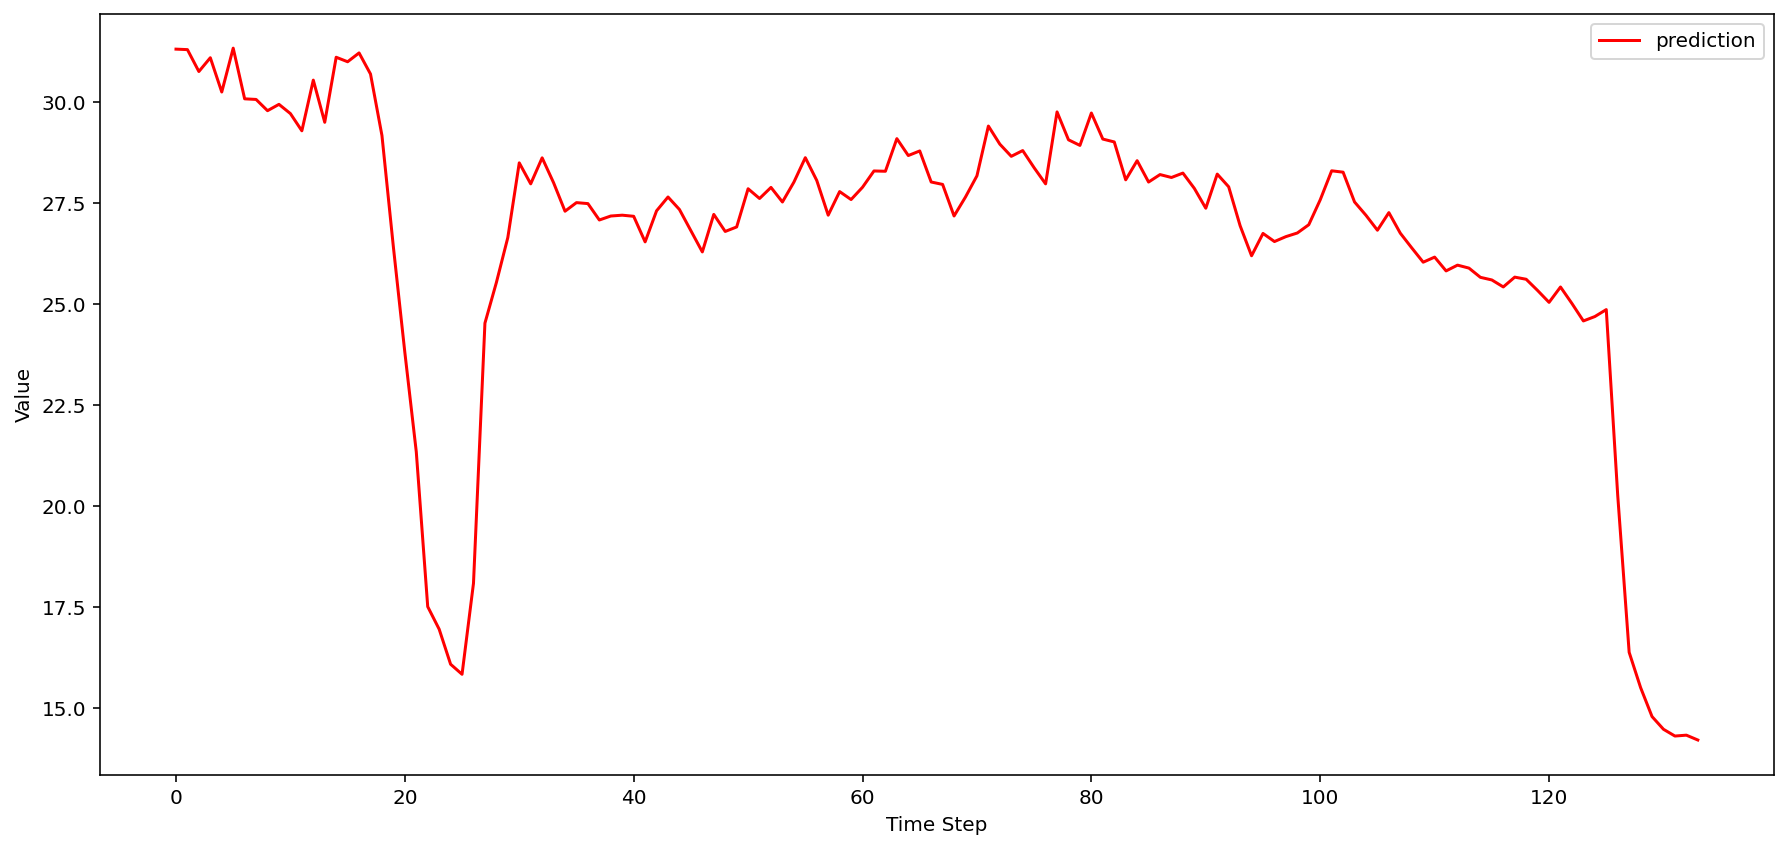

In [102]:
# menampilkan hasil forcasting
fig = plt.figure(figsize=(15,7))
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

## Membandingkan Hasil Prediksi dengan Data Sebenarnya

In [103]:
# Mengambil nilai objektif aktual
objektif_aktual = data_coba[['Bearing 1X Axis Vibration']].tail(144)

In [104]:
# membuat fungsi reshape objektif
def reshape_objektif(y, time_steps=10):
    ys = []
    for i in range(len(y) - time_steps):     
        ys.append(y.iloc[i + time_steps])
    return np.array(ys)

In [105]:
# melakukan reshape terhadap objektif menjadi array numpy 2 dimensi
true_objektif = reshape_objektif(objektif_aktual, time_steps)
print(true_objektif.shape)

(134, 1)


In [106]:
true_objektif = rescaler.inverse_transform(true_objektif)

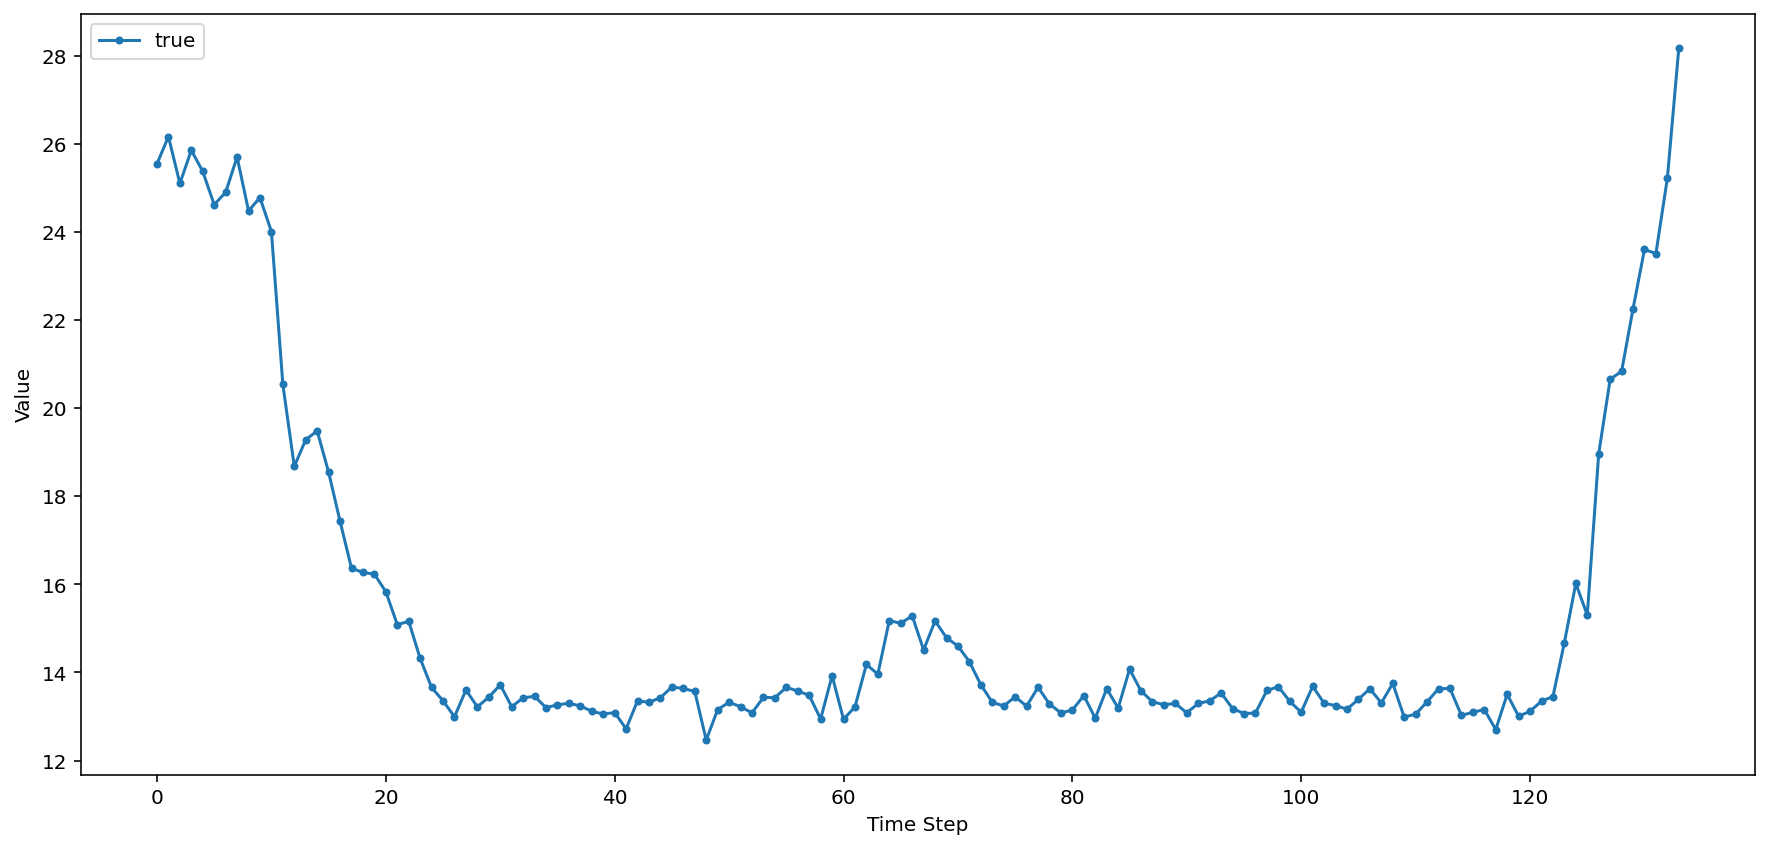

In [107]:
# menampilkan data objektif aktual
fig = plt.figure(figsize=(15,7))
plt.plot(true_objektif, marker='.', label="true")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

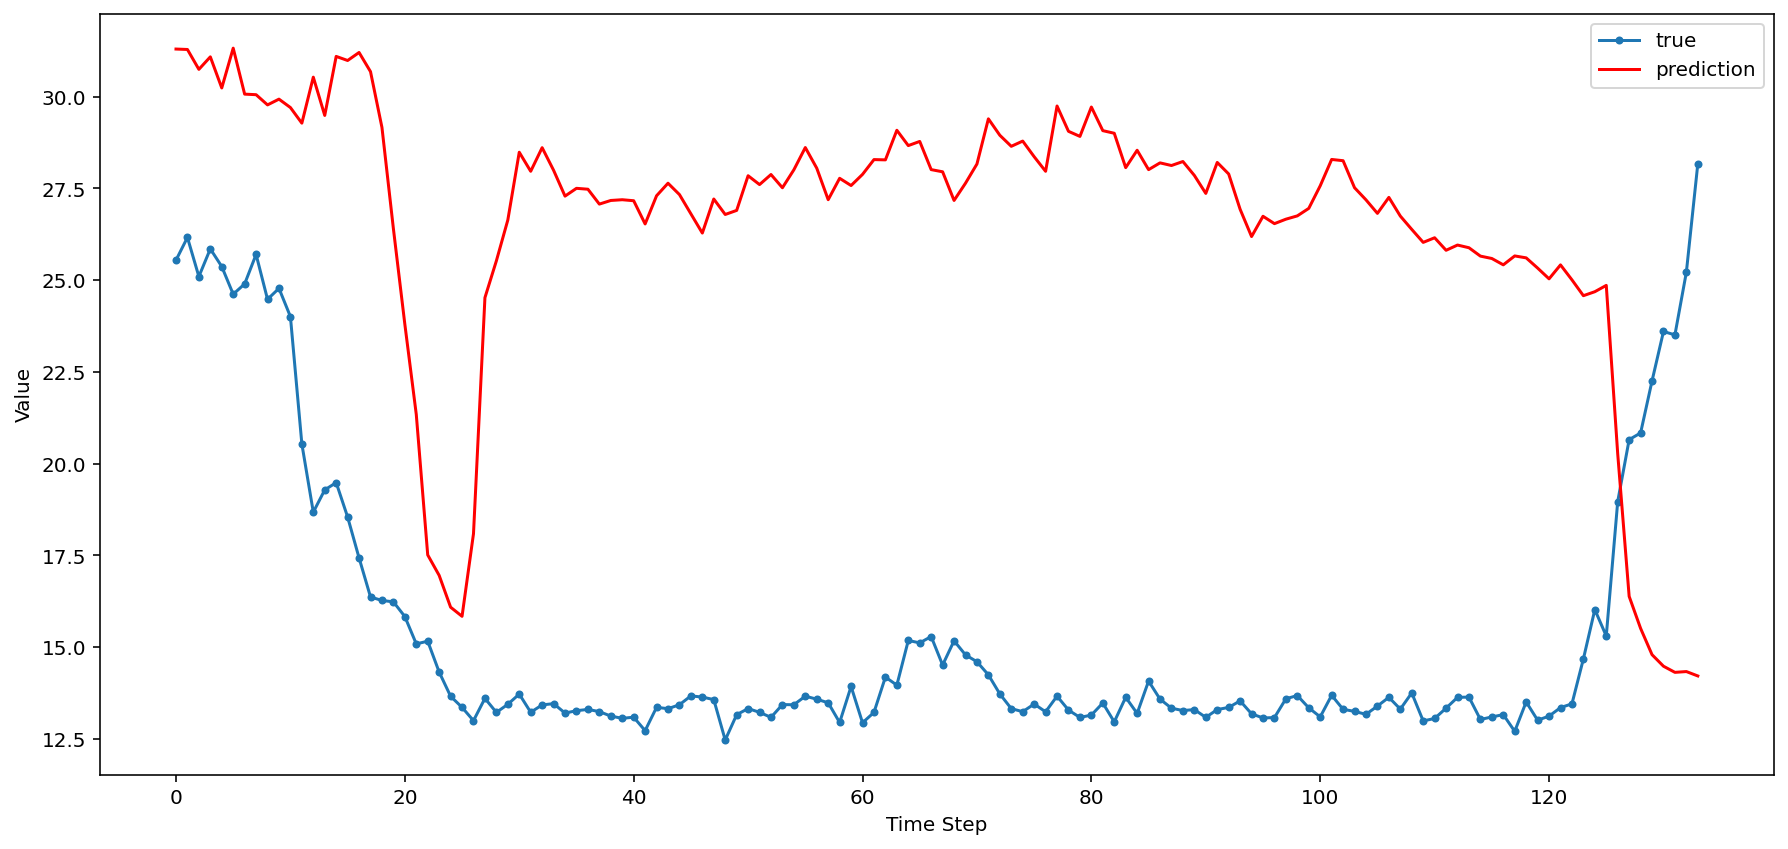

In [108]:
# menampilkan data objektif aktual dan hasil prediksi
fig = plt.figure(figsize=(15,7))
plt.plot(true_objektif, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [109]:
# Nilai R square
# menunjukkan seberapa identik prediksi dibanding nilai aktual

R2c = r2_score(true_objektif, y_pred)
print('R2 Score: %f' % R2c)

R2 Score: -9.467317
